In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [2]:
train = pd.read_csv('input/fraudTrain.csv')
test = pd.read_csv('input/fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


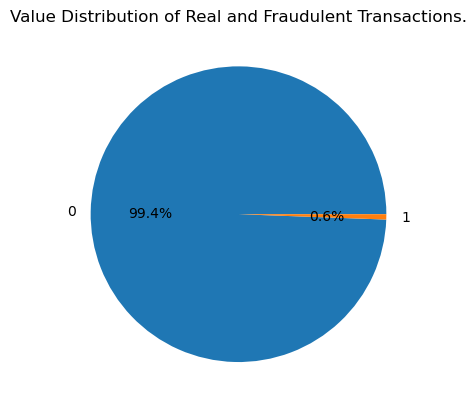

<Figure size 1000x600 with 0 Axes>

In [3]:
data = train['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution of Real and Fraudulent Transactions.")
plt.figure(figsize=(10, 6))
plt.show()

In [4]:
train.drop(['Unnamed: 0','cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
test.drop(['Unnamed: 0','cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [5]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [6]:
#Calculate Age
train["age"] = train["trans_date"]-train["dob"]
train["age"]=train["age"].astype('timedelta64[Y]')

test["age"] = test["trans_date"]-test["dob"]
test["age"]=test["age"].astype('timedelta64[Y]')
 

In [7]:
# Get Transaction Month & Year
train['trans_month'] = pd.DatetimeIndex(train['trans_date']).month
train['trans_year'] = pd.DatetimeIndex(train['trans_date']).year
test['trans_month'] = pd.DatetimeIndex(test['trans_date']).month
test['trans_year'] = pd.DatetimeIndex(test['trans_date']).year
train

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21,58.0,6,2020
1296671,2020-06-21 12:12:19,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21,40.0,6,2020
1296672,2020-06-21 12:12:32,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21,52.0,6,2020
1296673,2020-06-21 12:13:36,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21,39.0,6,2020


In [8]:
#Calculate distance between merchant and home location
train['latitudinal_distance'] = abs(round(train['merch_lat']-train['lat'],3))
train['longitudinal_distance'] = abs(round(train['merch_long']-train['long'],3))

test['latitudinal_distance'] = abs(round(test['merch_lat']-test['lat'],3))
test['longitudinal_distance'] = abs(round(test['merch_long']-test['long'],3))
train
                           

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0,1,2019,0.068,0.870
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0,1,2019,0.271,0.024
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0,1,2019,0.970,0.108
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0,1,2019,0.804,0.447
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0,1,2019,0.254,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21,58.0,6,2020,0.876,0.787
1296671,2020-06-21 12:12:19,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21,40.0,6,2020,0.360,0.736
1296672,2020-06-21 12:12:32,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21,52.0,6,2020,0.680,0.688
1296673,2020-06-21 12:13:36,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21,39.0,6,2020,0.564,0.700


In [9]:
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# Calculate distance
train['distance'] = train.apply(lambda row: haversine(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)
train

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",...,36.011293,-82.048315,0,2019-01-01,30.0,1,2019,0.068,0.870,78.597568
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,...,49.159047,-118.186462,0,2019-01-01,40.0,1,2019,0.271,0.024,30.212176
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,...,43.150704,-112.154481,0,2019-01-01,56.0,1,2019,0.970,0.108,108.206083
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,...,47.034331,-112.561071,0,2019-01-01,51.0,1,2019,0.804,0.447,95.673231
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,...,38.674999,-78.632459,0,2019-01-01,32.0,1,2019,0.254,0.830,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,...,36.841266,-111.690765,0,2020-06-21,58.0,6,2020,0.876,0.787,119.752136
1296671,2020-06-21 12:12:19,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",...,38.906881,-78.246528,0,2020-06-21,40.0,6,2020,0.360,0.736,75.104085
1296672,2020-06-21 12:12:32,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,...,33.619513,-105.130529,0,2020-06-21,52.0,6,2020,0.680,0.688,99.047734
1296673,2020-06-21 12:13:36,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,...,42.788940,-103.241160,0,2020-06-21,39.0,6,2020,0.564,0.700,84.627652


In [10]:
#time in a day vs fraud
train['hour']=pd.to_datetime(train['trans_date_trans_time']).dt.hour
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
 

In [11]:
#day of week vs fraud
train['day']=pd.to_datetime(train['trans_date_trans_time']).dt.dayofweek
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek

In [12]:
test['distance'] = test.apply(lambda row: haversine(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)

test

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,...,is_fraud,trans_date,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,hour,day,distance
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,...,0,2020-06-21,52.0,6,2020,0.020,0.265,12,6,24.561462
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",...,0,2020-06-21,30.0,6,2020,0.870,0.476,12,6,104.925092
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",...,0,2020-06-21,49.0,6,2020,0.177,0.660,12,6,59.080078
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,...,0,2020-06-21,32.0,6,2020,0.243,0.064,12,6,27.698567
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,...,0,2020-06-21,64.0,6,2020,0.706,0.868,12,6,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,Town planner,...,0,2020-12-31,54.0,12,2020,0.546,0.558,23,3,77.026148
555715,2020-12-31 23:59:09,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,...,0,2020-12-31,21.0,12,2020,0.622,0.747,23,3,100.074420
555716,2020-12-31 23:59:15,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,...,0,2020-12-31,39.0,12,2020,0.462,0.813,23,3,80.759302
555717,2020-12-31 23:59:24,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,Cartographer,...,0,2020-12-31,55.0,12,2020,0.155,0.632,23,3,52.933240


In [13]:
#Drop Columns that are not relevant to predicy fraud transaction
#drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
drop_columns = ['hour','day','trans_date_trans_time','city','lat','long' ,'dob','merch_lat','merch_long','trans_date','state']
train.drop(columns=drop_columns,inplace=True)
test.drop(columns=drop_columns,inplace=True)
train

,category,amt,gender,city_pop,job,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance
0,misc_net,4.97,F,3495,"Psychologist, counselling",0,30.0,1,2019,0.068,0.870,78.597568
1,grocery_pos,107.23,F,149,Special educational needs teacher,0,40.0,1,2019,0.271,0.024,30.212176
2,entertainment,220.11,M,4154,Nature conservation officer,0,56.0,1,2019,0.970,0.108,108.206083
3,gas_transport,45.00,M,1939,Patent attorney,0,51.0,1,2019,0.804,0.447,95.673231
4,misc_pos,41.96,M,99,Dance movement psychotherapist,0,32.0,1,2019,0.254,0.830,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,258,Geoscientist,0,58.0,6,2020,0.876,0.787,119.752136
1296671,food_dining,51.70,M,100,"Production assistant, television",0,40.0,6,2020,0.360,0.736,75.104085
1296672,food_dining,105.93,M,899,Naval architect,0,52.0,6,2020,0.680,0.688,99.047734
1296673,food_dining,74.90,M,1126,Volunteer coordinator,0,39.0,6,2020,0.564,0.700,84.627652


In [14]:
cols = [col for col in train.columns if col != 'is_fraud']

# Add 'is_fraud' at the end of the list
cols.append('is_fraud')

# Reorder the DataFrame
train = train[cols]
train
# test = test[cols]
# train

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud
0,misc_net,4.97,F,3495,"Psychologist, counselling",30.0,1,2019,0.068,0.870,78.597568,0
1,grocery_pos,107.23,F,149,Special educational needs teacher,40.0,1,2019,0.271,0.024,30.212176,0
2,entertainment,220.11,M,4154,Nature conservation officer,56.0,1,2019,0.970,0.108,108.206083,0
3,gas_transport,45.00,M,1939,Patent attorney,51.0,1,2019,0.804,0.447,95.673231,0
4,misc_pos,41.96,M,99,Dance movement psychotherapist,32.0,1,2019,0.254,0.830,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,258,Geoscientist,58.0,6,2020,0.876,0.787,119.752136,0
1296671,food_dining,51.70,M,100,"Production assistant, television",40.0,6,2020,0.360,0.736,75.104085,0
1296672,food_dining,105.93,M,899,Naval architect,52.0,6,2020,0.680,0.688,99.047734,0
1296673,food_dining,74.90,M,1126,Volunteer coordinator,39.0,6,2020,0.564,0.700,84.627652,0


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [16]:
#train["categoryname"] = train["category"]
train["category"] = encoder.fit_transform(train["category"])
train

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud
0,8,4.97,F,3495,"Psychologist, counselling",30.0,1,2019,0.068,0.870,78.597568,0
1,4,107.23,F,149,Special educational needs teacher,40.0,1,2019,0.271,0.024,30.212176,0
2,0,220.11,M,4154,Nature conservation officer,56.0,1,2019,0.970,0.108,108.206083,0
3,2,45.00,M,1939,Patent attorney,51.0,1,2019,0.804,0.447,95.673231,0
4,9,41.96,M,99,Dance movement psychotherapist,32.0,1,2019,0.254,0.830,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,M,258,Geoscientist,58.0,6,2020,0.876,0.787,119.752136,0
1296671,1,51.70,M,100,"Production assistant, television",40.0,6,2020,0.360,0.736,75.104085,0
1296672,1,105.93,M,899,Naval architect,52.0,6,2020,0.680,0.688,99.047734,0
1296673,1,74.90,M,1126,Volunteer coordinator,39.0,6,2020,0.564,0.700,84.627652,0


In [17]:
#test["categoryname"] = test["category"]
test["category"] = encoder.fit_transform(test["category"])
test

,category,amt,gender,city_pop,job,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance
0,10,2.86,M,333497,Mechanical engineer,0,52.0,6,2020,0.020,0.265,24.561462
1,10,29.84,F,302,"Sales professional, IT",0,30.0,6,2020,0.870,0.476,104.925092
2,5,41.28,F,34496,"Librarian, public",0,49.0,6,2020,0.177,0.660,59.080078
3,9,60.05,M,54767,Set designer,0,32.0,6,2020,0.243,0.064,27.698567
4,13,3.19,M,1126,Furniture designer,0,64.0,6,2020,0.706,0.868,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,M,519,Town planner,0,54.0,12,2020,0.546,0.558,77.026148
555715,7,111.84,M,28739,Futures trader,0,21.0,12,2020,0.622,0.747,100.074420
555716,7,86.88,F,3684,Musician,0,39.0,12,2020,0.462,0.813,80.759302
555717,13,7.99,M,129,Cartographer,0,55.0,12,2020,0.155,0.632,52.933240


In [18]:
# fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
# sns.boxplot(ax=axes[1, 1], data=train, x='amt', y='is_fraud', palette='Spectral')
# axes[1,1].set_title("amt distribution");

In [19]:

#train["category"] = encoder.fit_transform(train["category"])
train["gender"] = encoder.fit_transform(train["gender"])
test["gender"] = encoder.fit_transform(test["gender"])
train["job"] = encoder.fit_transform(train["job"])
    
# test["category"] = encoder.fit_transform(test["category"])

test["job"] = encoder.fit_transform(test["job"])
train

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0


In [20]:
fraud_rows = train[train['is_fraud'] == 1]
real_rows = train[train['is_fraud'] == 0]

y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

In [21]:
# Ensure there are no zeros or negative values in the columns to be transformed
real_rows['amt'] = real_rows['amt'].apply(lambda x: x + 1 if x == 0 else x)
real_rows['city_pop'] = real_rows['city_pop'].apply(lambda x: x + 1 if x == 0 else x)
real_rows['distance'] = real_rows['distance'].apply(lambda x: x + 1 if x == 0 else x)

C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3354195259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rows['amt'] = real_rows['amt'].apply(lambda x: x + 1 if x == 0 else x)
C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3354195259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rows['city_pop'] = real_rows['city_pop'].apply(lambda x: x + 1 if x == 0 else x)
C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3354195259.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [22]:
real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0


In [23]:
# Apply log transformation
log_real_rows=real_rows.copy()
log_real_rows['log_amt'] = np.log(log_real_rows['amt'])
log_real_rows['log_city_pop'] = np.log(log_real_rows['city_pop'])
log_real_rows['log_distance'] = np.log(log_real_rows['distance'])
log_real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,log_amt,log_city_pop,log_distance
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0,1.603420,8.159089,4.364341
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0,4.674976,5.003946,3.408245
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0,5.394127,8.331827,4.684038
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0,3.806662,7.569928,4.560939
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0,3.736717,4.595120,4.351010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0,2.744704,5.552960,4.785424
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0,3.945458,4.605170,4.318875
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0,4.662778,6.801283,4.595602
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0,4.316154,7.026427,4.438261


In [24]:
# feature_list = ['category', 'amt', 'gender', 'city_pop', 'job', 'age', 'trans_month', 'trans_year', 'latitudinal_distance',
#                 'longitudinal_distance', 'distance' 
#                ,'log_amt' ,'log_city_pop','log_distance']
feature_list = [ 'log_amt' ,'log_city_pop','log_distance']

In [25]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        #print(column,z_score)
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return df1 # multiple_outliers

In [26]:
sorted_real_rows = real_rows.sort_values(by='amt')
sorted_real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud
786894,1,1.00,1,17867,480,21.0,12,2019,0.373,0.868,82.420892,0
145995,11,1.00,0,2906700,27,35.0,3,2019,0.313,0.659,72.563545,0
595297,5,1.00,0,241,254,44.0,9,2019,0.291,0.516,55.892095,0
712554,12,1.00,0,9594,418,21.0,10,2019,0.011,0.504,39.330673,0
1044621,11,1.00,0,443,131,72.0,3,2020,0.350,0.764,77.907569,0
...,...,...,...,...,...,...,...,...,...,...,...,...
352894,13,25086.94,1,76383,215,34.0,6,2019,0.294,0.314,41.575029,0
606211,13,26544.12,1,4471,314,45.0,9,2019,0.316,0.060,35.598632,0
1234797,13,27119.77,1,83,45,61.0,5,2020,0.346,0.996,96.332300,0
793677,13,27390.12,1,7987,460,55.0,12,2019,0.530,0.962,99.553533,0


In [27]:
# detecting outliers
Outliers_z_score = z_score_method(log_real_rows,1,feature_list)
sorted_real_rows = Outliers_z_score.sort_values(by='amt')
sorted_real_rows

Total number of outliers is: 21753


,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,log_amt,log_city_pop,log_distance
221352,12,1.00,1,176,406,55.0,4,2019,0.050,0.061,7.450259,0,0.000000,5.170484,2.008249
560540,12,1.00,0,1334,30,32.0,8,2019,0.013,0.019,2.170354,0,0.000000,7.195937,0.774890
258695,10,1.00,1,3776,430,42.0,5,2019,0.110,0.043,12.935423,0,0.000000,8.236421,2.559970
152350,11,1.00,0,276002,341,84.0,3,2019,0.075,0.032,8.893377,0,0.000000,12.528163,2.185307
401206,11,1.00,0,2328,28,77.0,7,2019,0.050,0.011,5.617018,0,0.000000,7.752765,1.725801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725188,12,4097.87,0,217,459,29.0,11,2019,0.057,0.009,6.428424,0,8.318223,5.379897,1.860729
723392,11,5207.16,1,2836,126,33.0,11,2019,0.105,0.002,11.636893,0,8.557790,7.950150,2.454180
1090494,12,5339.63,0,1617,292,29.0,3,2020,0.099,0.006,11.070694,0,8.582912,7.388328,2.404301
375430,13,11371.95,1,365,429,49.0,6,2019,0.028,0.064,6.356791,0,9.338905,5.899897,1.849524


In [28]:
# Z-score calculation function
def calculate_z_scores(df):
    z_scores = (df - df.mean()) / df.std()
    return z_scores
def calculate_modified_z_scores(df):
    median = df.median()
    mad = df.mad()
    modified_z_scores = 0.6745 * (df - median) / mad
    return modified_z_scores
def calculate_iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df < lower_bound) | (df > upper_bound))
    return outliers

In [29]:
    # Calculate Z-scores
    z_scores = calculate_z_scores(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])

    # Identify outliers (using a threshold of 3 standard deviations)
    outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

    # Display the outliers
    print("\nOutliers:\n", outliers.shape[0])
    outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
    outliers


Outliers:
 22502


,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,log_amt,log_city_pop,log_distance
7,2,71.65,1,6018,127,71.0,1,2019,0.105,0.060,12.766923,0,4.271793,8.702510,2.546858
51,3,50.82,0,551,23,48.0,1,2019,0.006,0.081,7.411873,0,3.928290,6.311735,2.003083
58,3,50.45,1,1195,477,44.0,1,2019,0.035,0.135,11.824242,0,3.920983,7.085901,2.470152
68,11,83.52,1,2202,427,44.0,1,2019,0.031,0.073,7.002241,0,4.425086,7.697121,1.946230
126,2,58.79,0,1271,354,60.0,1,2019,0.042,0.008,4.737994,0,4.073972,7.147559,1.555614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296546,4,56.16,1,20328,422,35.0,6,2020,0.009,0.139,13.017429,0,4.028205,9.919755,2.566289
1296567,8,168.53,1,9496,203,27.0,6,2020,0.086,0.108,13.700631,0,5.127114,9.158626,2.617442
1296636,4,98.98,1,1446,70,42.0,6,2020,0.031,0.058,5.647262,0,4.594918,7.276556,1.731171
1296652,0,125.14,1,267,189,15.0,6,2020,0.129,0.006,14.317116,0,4.829433,5.587249,2.661456


In [30]:
from scipy import stats
boxcox_real_rows=real_rows.copy()


# Apply Box-Cox transformation
boxcox_real_rows['boxcox_amt'], lam_amt = stats.boxcox(boxcox_real_rows['amt'])
boxcox_real_rows['boxcox_city_pop'], lam_city_pop = stats.boxcox(boxcox_real_rows['city_pop'])
boxcox_real_rows['boxcox_distance'], lam_distance = stats.boxcox(boxcox_real_rows['distance'])

boxcox_real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,boxcox_amt,boxcox_city_pop,boxcox_distance
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0,1.807314,5.397531,102.681671
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0,6.712642,3.853773,35.926165
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0,8.216548,5.467640,145.461848
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0,5.095727,5.148198,127.219696
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0,4.974208,3.611882,101.199081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0,3.378293,4.162053,162.420930
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0,5.340578,3.617959,97.711841
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0,6.688476,4.797793,132.113361
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0,6.019457,4.903498,111.301950


In [31]:

# Calculate Z-scores
z_scores = calculate_z_scores(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = boxcox_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers


Outliers:
 4399


,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,boxcox_amt,boxcox_city_pop,boxcox_distance
232,11,1055.47,1,648,97,49.0,1,2019,0.829,0.431,99.127145,0,12.099051,4.639363,132.228687
296,11,909.66,0,736284,175,66.0,1,2019,0.831,0.554,104.132972,0,11.691412,7.057035,139.513391
511,8,1636.87,0,1324,174,92.0,1,2019,0.040,0.948,89.832164,0,13.355269,4.977956,118.782394
723,8,1047.52,0,969,337,64.0,1,2019,0.321,0.411,51.730158,0,12.078105,4.833286,64.988473
824,11,1433.54,0,1288,44,82.0,1,2019,0.202,0.280,31.244600,0,12.966995,4.965378,37.289561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294202,13,1145.82,0,922,137,47.0,6,2020,0.423,0.915,90.830189,0,12.328090,4.809783,120.220945
1294387,12,2098.05,1,18408,226,47.0,6,2020,0.236,0.101,27.756411,0,14.102467,6.019990,32.698546
1294714,11,2090.14,0,888,60,32.0,6,2020,0.580,0.387,72.326938,0,14.090892,4.791937,93.774399
1295903,8,819.11,1,9679,171,29.0,6,2020,0.033,0.898,73.347166,0,11.409208,5.792470,95.219479


In [32]:
# feature_list = ['category', 'amt', 'gender', 'city_pop', 'job', 'age', 'trans_month', 'trans_year', 'latitudinal_distance',
#                 'longitudinal_distance', 'distance' 
#                ,'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']
# Outliers_boxcox_real_rows = z_score_method(boxcox_real_rows,1,feature_list)
# sorted_real_rows = Outliers_boxcox_real_rows.sort_values(by='amt')
# sorted_real_rows

In [33]:
from scipy import stats

yeojohnson_real_rows =real_rows.copy()
# Apply Yeo-Johnson transformation
yeojohnson_real_rows['yeojohnson_amt'], lam_amt = stats.yeojohnson(yeojohnson_real_rows['amt'])
yeojohnson_real_rows['yeojohnson_city_pop'], lam_city_pop = stats.yeojohnson(yeojohnson_real_rows['city_pop'])
yeojohnson_real_rows['yeojohnson_distance'], lam_distance = stats.yeojohnson(yeojohnson_real_rows['distance'])
yeojohnson_real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,yeojohnson_amt,yeojohnson_city_pop,yeojohnson_distance
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0,1.978320,5.380882,106.935693
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0,6.161468,3.849794,37.998118
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0,7.419171,5.450456,151.272204
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0,4.781924,5.133403,132.354892
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0,4.677290,3.611140,105.400963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0,3.299002,4.154869,168.872435
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0,4.992411,3.617125,101.791622
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0,6.141048,4.785542,137.428108
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0,5.573238,4.890479,115.861711


In [34]:
# feature_list = ['category', 'amt', 'gender', 'city_pop', 'job', 'age', 'trans_month', 'trans_year', 'latitudinal_distance',
#                 'longitudinal_distance', 'distance' 
#                ,'yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']
# Outliers_yeojohnson_real_rows = z_score_method(yeojohnson_real_rows,1,feature_list)
# sorted_real_rows = Outliers_yeojohnson_real_rows.sort_values(by='amt')
# sorted_real_rows


# Calculate Z-scores
z_scores = calculate_z_scores(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = yeojohnson_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers


Outliers:
 4080


,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,yeojohnson_amt,yeojohnson_city_pop,yeojohnson_distance
232,11,1055.47,1,648,97,49.0,1,2019,0.829,0.431,99.127145,0,10.551018,4.628280,137.547679
296,11,909.66,0,736284,175,66.0,1,2019,0.831,0.554,104.132972,0,10.229464,7.024649,145.101860
511,8,1636.87,0,1324,174,92.0,1,2019,0.040,0.948,89.832164,0,11.532172,4.964398,123.610889
723,8,1047.52,0,969,337,64.0,1,2019,0.321,0.411,51.730158,0,10.534534,4.820777,67.963439
824,11,1433.54,0,1288,44,82.0,1,2019,0.202,0.280,31.244600,0,11.230454,4.951911,39.401805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294006,12,873.74,0,10076,442,42.0,6,2020,0.366,0.787,86.039197,0,10.143253,5.787274,117.959378
1294202,13,1145.82,0,922,137,47.0,6,2020,0.423,0.915,90.830189,0,10.730993,4.797445,125.101469
1294387,12,2098.05,1,18408,226,47.0,6,2020,0.236,0.101,27.756411,0,12.109069,5.998271,34.676048
1294714,11,2090.14,0,888,60,32.0,6,2020,0.580,0.387,72.326938,0,12.100168,4.779729,97.717239


In [35]:
from scipy import stats

sqrt_real_rows =real_rows.copy()
# Apply Yeo-Johnson transformation
sqrt_real_rows['sqrt_amt'] = np.sqrt(sqrt_real_rows['amt'])
sqrt_real_rows['sqrt_city_pop'] = np.sqrt(sqrt_real_rows['city_pop'])
sqrt_real_rows['sqrt_distance'] = np.sqrt(sqrt_real_rows['distance'])
sqrt_real_rows

,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,sqrt_amt,sqrt_city_pop,sqrt_distance
0,8,4.97,0,3495,370,30.0,1,2019,0.068,0.870,78.597568,0,2.229350,59.118525,8.865527
1,4,107.23,0,149,428,40.0,1,2019,0.271,0.024,30.212176,0,10.355192,12.206556,5.496560
2,0,220.11,1,4154,307,56.0,1,2019,0.970,0.108,108.206083,0,14.836105,64.451532,10.402215
3,2,45.00,1,1939,328,51.0,1,2019,0.804,0.447,95.673231,0,6.708204,44.034078,9.781269
4,9,41.96,1,99,116,32.0,1,2019,0.254,0.830,77.556744,0,6.477654,9.949874,8.806631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,258,215,58.0,6,2020,0.876,0.787,119.752136,0,3.944617,16.062378,10.943132
1296671,1,51.70,1,100,360,40.0,6,2020,0.360,0.736,75.104085,0,7.190271,10.000000,8.666261
1296672,1,105.93,1,899,308,52.0,6,2020,0.680,0.688,99.047734,0,10.292230,29.983329,9.952273
1296673,1,74.90,1,1126,485,39.0,6,2020,0.564,0.700,84.627652,0,8.654479,33.555923,9.199329


In [36]:
# Calculate Z-scores
z_scores = calculate_z_scores(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = sqrt_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers


Outliers:
 64534


,category,amt,gender,city_pop,job,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,distance,is_fraud,sqrt_amt,sqrt_city_pop,sqrt_distance
51,3,50.82,0,551,23,48.0,1,2019,0.006,0.081,7.411873,0,7.128815,23.473389,2.722475
53,1,122.86,1,1263321,457,76.0,1,2019,0.488,0.719,86.500342,0,11.084223,1123.975534,9.300556
65,8,2.76,0,973849,406,63.0,1,2019,0.218,0.255,33.077594,0,1.661325,986.837879,5.751312
68,11,83.52,1,2202,427,44.0,1,2019,0.031,0.073,7.002241,0,9.138928,46.925473,2.646175
105,12,9.23,0,1577385,42,61.0,1,2019,0.625,0.936,104.849230,0,3.038092,1255.939887,10.239591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296547,8,754.81,1,20328,422,35.0,6,2020,0.110,0.589,56.364997,0,27.473806,142.576295,7.507663
1296550,3,35.68,1,1382480,466,29.0,6,2020,0.558,0.570,78.270308,0,5.973274,1175.789097,8.847051
1296573,2,57.77,1,1263321,125,67.0,6,2020,0.358,0.834,87.730340,0,7.600658,1123.975534,9.366448
1296636,4,98.98,1,1446,70,42.0,6,2020,0.031,0.058,5.647262,0,9.948869,38.026307,2.376397


In [37]:
#stop 1 

SyntaxError: invalid syntax (3294805581.py, line 1)

In [ ]:

# Calculate Z-scores
z_scores = calculate_modified_z_scores(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers

In [ ]:

# Calculate Z-scores
z_scores = calculate_modified_z_scores(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = boxcox_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers

In [ ]:

# Calculate Z-scores
z_scores = calculate_modified_z_scores(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = yeojohnson_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers

In [ ]:
# Calculate Z-scores
z_scores = calculate_modified_z_scores(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])

# Identify outliers (using a threshold of 3 standard deviations)
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Display the outliers
print("\nOutliers:\n", outliers.shape[0])
outliers = sqrt_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outliers

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_iqr_outliers(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])

outlier_rows = log_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_iqr_outliers(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])

outlier_rows = boxcox_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows


 

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_iqr_outliers(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])

outlier_rows = yeojohnson_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows


 

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_iqr_outliers(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])

outlier_rows = sqrt_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows



 

In [ ]:
def calculate_std_outliers(df, threshold=3):
    mean = df.mean()
    std = df.std()
    
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

def get_std_outlier_rows(df, threshold=3):
    outliers = calculate_std_outliers(df, threshold)
    outlier_rows = df[outliers.any(axis=1)]
    return outlier_rows

In [ ]:
# Calculate standarddeviation method
iqr_outliers = calculate_std_outliers(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])

outlier_rows = log_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_std_outliers(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])

outlier_rows = boxcox_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_std_outliers(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])

outlier_rows = yeojohnson_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows

In [ ]:
# Calculate Z-scores
iqr_outliers = calculate_std_outliers(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])

outlier_rows = sqrt_real_rows[iqr_outliers.any(axis=1)]
 
# # Identify outliers (using a threshold of 3 standard deviations)
# outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Display the outliers
print("\nOutliers:\n", outlier_rows.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
outlier_rows


In [ ]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df, contamination=0.05):
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(df)
    
    # Predicting the outliers
    df['outlier'] = model.predict(df)
    # In IsolationForest, -1 indicates an outlier and 1 indicates an inlier
    outliers = df[df['outlier'] == -1]
    
    # Dropping the 'outlier' column for clean output
    df.drop('outlier', axis=1, inplace=True)
    
    return outliers

In [ ]:
# Calculate Z-scores
if_outliers = detect_outliers_isolation_forest(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])
# # Display the outliers
print("\nOutliers:\n",  if_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
if_outliers

In [ ]:
# Calculate Z-scores
if_outliers = detect_outliers_isolation_forest(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])
# # Display the outliers
print("\nOutliers:\n",  if_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
if_outliers


 

In [ ]:
# Calculate Z-scores
if_outliers = detect_outliers_isolation_forest(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])
# # Display the outliers
print("\nOutliers:\n",  if_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
if_outliers
 

In [ ]:
# Calculate Z-scores
if_outliers = detect_outliers_isolation_forest(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])
# # Display the outliers
print("\nOutliers:\n",  if_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
if_outliers


 

In [42]:
from sklearn.cluster import DBSCAN

def detect_outliers_dbscan(df, eps=0.5, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(df)
    
    # Predicting the clusters
    df['cluster'] = model.labels_
    # In DBSCAN, -1 indicates noise (outliers)
    outliers = df[df['cluster'] == -1]
    
    # Dropping the 'cluster' column for clean output
    df.drop('cluster', axis=1, inplace=True)
    
    return outliers
def detect_outliers_dbscan_chunked(df, eps=0.5, min_samples=5, chunk_size=100000):
    outliers_list = []

    for start in range(0, df.shape[0], chunk_size):
        end = start + chunk_size
        chunk_df = df.iloc[start:end]
        
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(chunk_df)
        
        chunk_df.loc[:, 'cluster'] = model.labels_
        #chunk_df['cluster'] = model.labels_
        outliers = chunk_df[chunk_df['cluster'] == -1]
        outliers_list.append(outliers)
        
    consolidated_outliers = pd.concat(outliers_list)
    
    return consolidated_outliers

In [82]:
def plotOulier(df, eps=0.5, min_samples=5, chunk_size=100000):
    outliers_list = []

    for start in range(0, df.shape[0], chunk_size):
        end = start + chunk_size
        chunk_df = df.iloc[start:end]
        
        model = DBSCAN(eps=eps, min_samples=min_samples)
        #model.fit(chunk_df)
        labels = model.fit_predict(chunk_df)
        
        chunk_df.loc[:, 'cluster'] = model.labels_
        #chunk_df['cluster'] = model.labels_
        outliers = chunk_df[chunk_df['cluster'] == -1]
        
        # Plot the results
        plt.scatter(chunk_df['log_amt'],chunk_df['log_distance'], c=labels, cmap='Paired', s=10)
        plt.title('DBSCAN Clustering')
        plt.xlabel('Amount')
        plt.ylabel('Distance')

        # Mark noise points (labeled as -1 by DBSCAN)
        #noise = X[labels == -1]
        plt.scatter(outliers['log_amt'], outliers['log_distance'], color='red', s=10, label='Noise')

        plt.legend()
        plt.show()

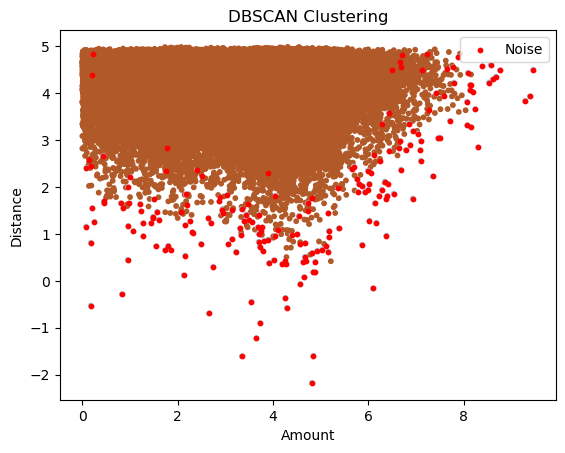

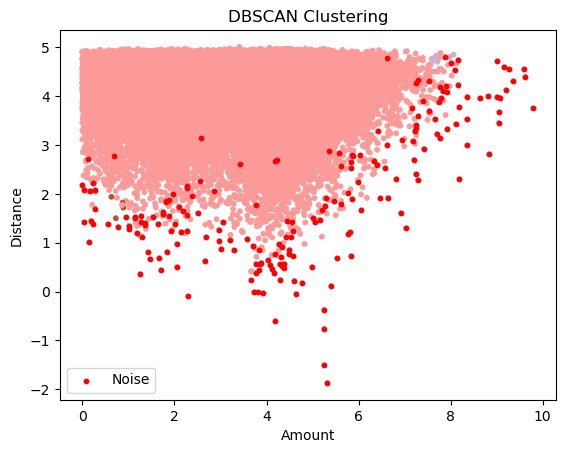

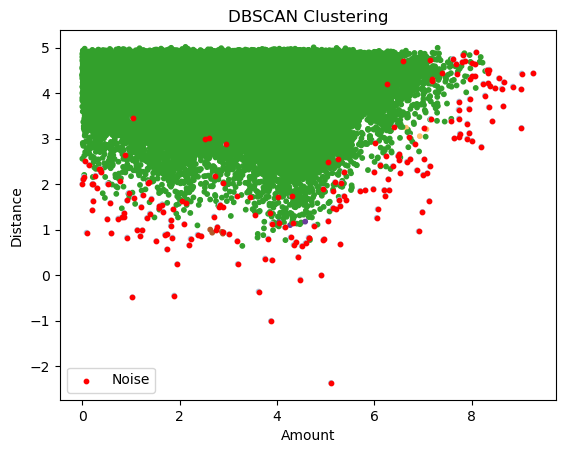

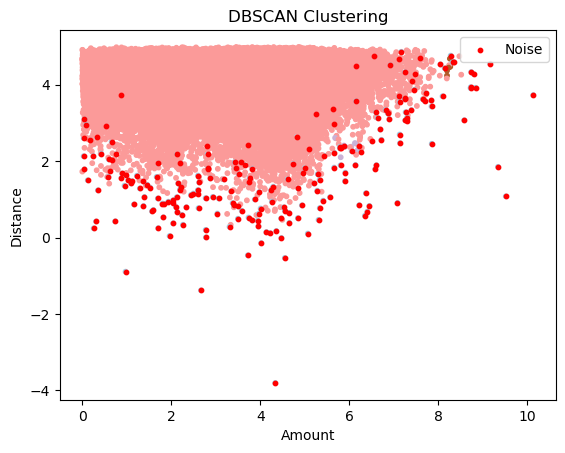

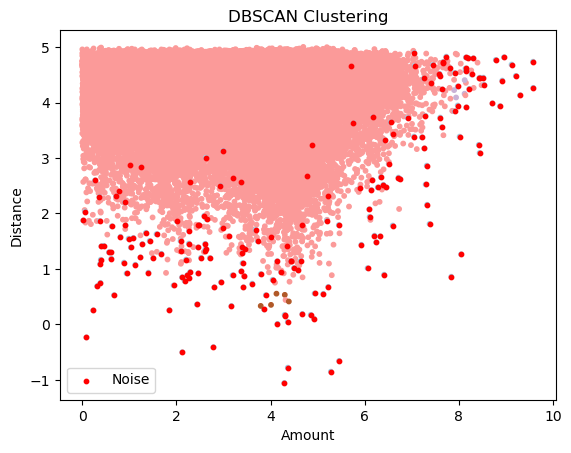

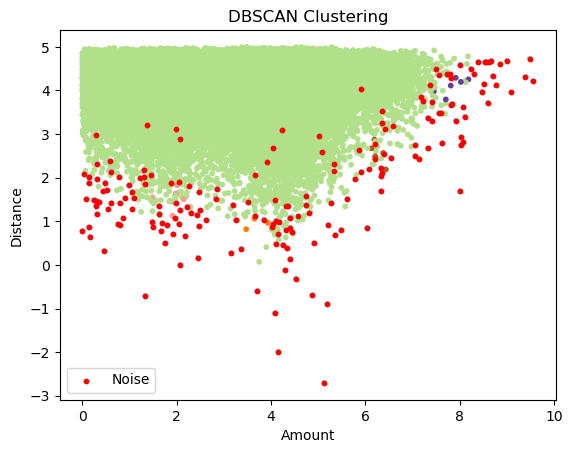

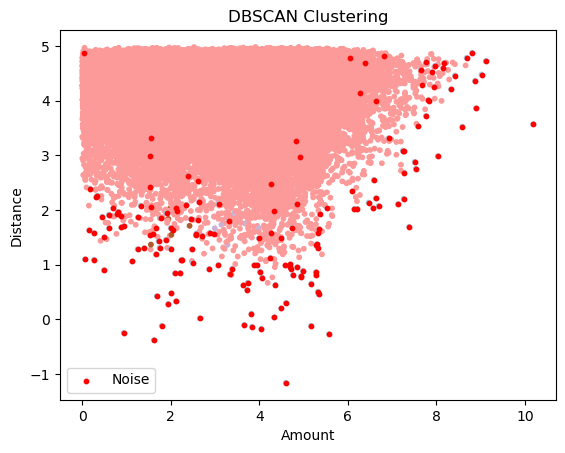

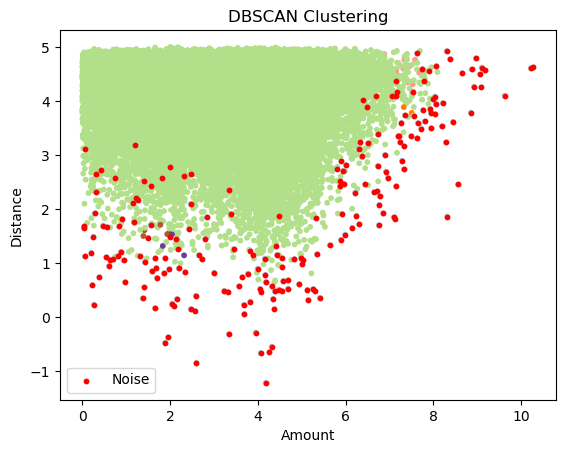

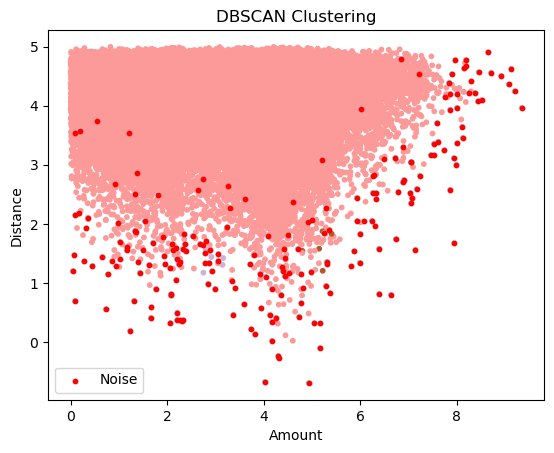

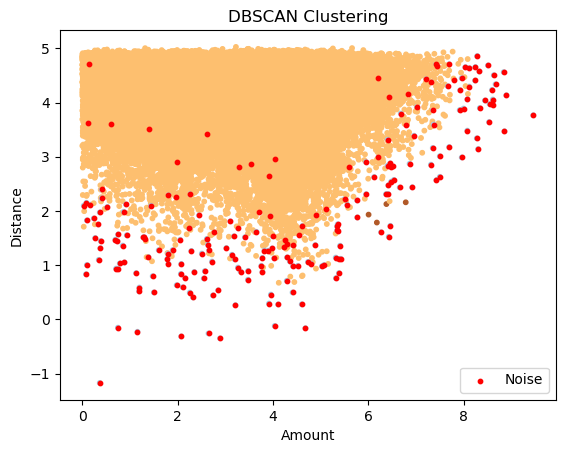

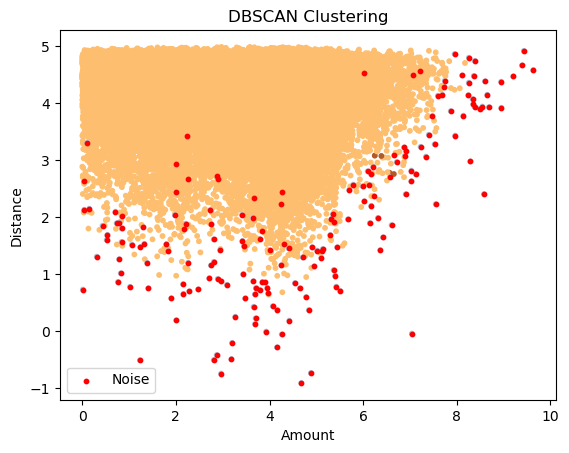

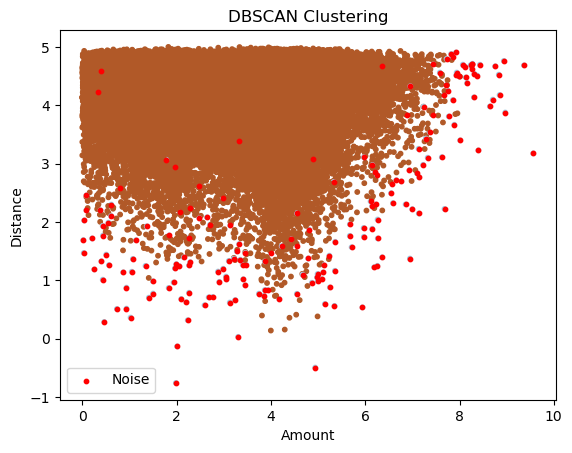

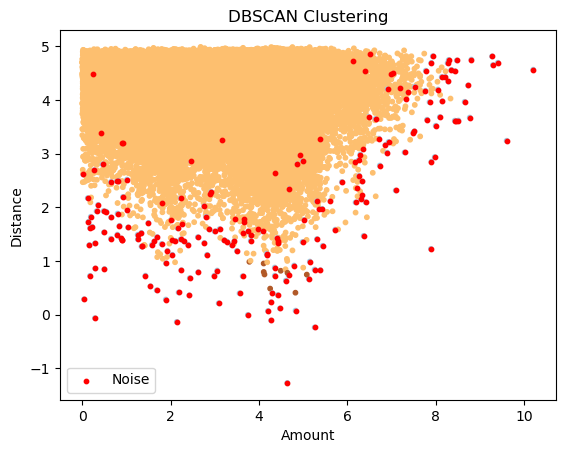

In [83]:
plotOulier(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])

In [43]:
pd.options.mode.chained_assignment = None  # default='warn'
dsscan_outliers = detect_outliers_dbscan_chunked(log_real_rows[[ 'log_amt' ,'log_city_pop','log_distance']])
# # Display the outliers
print("\nOutliers:\n",  dsscan_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
dsscan_outliers

C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3102520737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df.loc[:, 'cluster'] = model.labels_
C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3102520737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df.loc[:, 'cluster'] = model.labels_
C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3102520737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde


Outliers:
 2589


C:\Users\sanja\AppData\Local\Temp\ipykernel_139960\3102520737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df.loc[:, 'cluster'] = model.labels_


,log_amt,log_city_pop,log_distance,cluster
700,4.881437,6.464588,0.180092,-1
926,5.168949,9.161255,0.925891,-1
1191,3.724729,5.552960,-0.900531,-1
1784,8.064168,4.976734,3.820632,-1
2274,2.485740,6.246107,0.788879,-1
...,...,...,...,...
1292532,2.179287,8.988071,0.413804,-1
1294000,8.284239,11.176935,4.347189,-1
1294619,3.053057,5.846439,0.822463,-1
1295294,3.440739,11.481868,1.368540,-1


In [46]:
pd.options.mode.chained_assignment = None  # default='warn'

dsscan_outliers = detect_outliers_dbscan_chunked(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])
# # Display the outliers
print("\nOutliers:\n",  dsscan_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
dsscan_outliers


Outliers:
 102758


,boxcox_amt,boxcox_city_pop,boxcox_distance,cluster
16,9.114450,4.883247,115.208463,-1
42,6.616354,3.128175,122.859396,-1
51,5.310022,4.558768,7.140989,-1
59,7.750731,3.128175,87.217487,-1
67,8.941046,4.585275,93.381006,-1
...,...,...,...,...
1296614,1.405601,5.611827,183.257641,-1
1296627,3.101877,4.347534,29.932683,-1
1296657,8.624418,4.066866,107.699050,-1
1296661,6.091860,5.108149,3.012667,-1


In [47]:
pd.options.mode.chained_assignment = None  # default='warn'

dsscan_outliers = detect_outliers_dbscan_chunked(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])
# # Display the outliers
print("\nOutliers:\n",  dsscan_outliers.shape[0])
# outliers = log_real_rows[(np.abs(z_scores) > 3).any(axis=1)]
dsscan_outliers


Outliers:
 80890


,yeojohnson_amt,yeojohnson_city_pop,yeojohnson_distance,cluster
16,8.157821,4.870375,119.908180,-1
42,6.080070,3.137281,127.835630,-1
51,4.966170,4.548293,8.416401,-1
59,7.032372,3.137281,90.934546,-1
67,8.015876,4.574599,97.310218,-1
...,...,...,...,...
1296574,1.479250,4.133485,34.884903,-1
1296584,3.860345,4.477024,191.683787,-1
1296599,6.174081,3.227402,26.059786,-1
1296657,7.755825,4.060589,112.130497,-1


In [48]:
pd.options.mode.chained_assignment = None  # default='warn'

dsscan_outliers = detect_outliers_dbscan_chunked(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])
# # Display the outliers
print("\nOutliers:\n",  dsscan_outliers.shape[0]) 
dsscan_outliers


Outliers:
 411144


,sqrt_amt,sqrt_city_pop,sqrt_distance,cluster
2,14.836105,64.451532,10.402215,-1
7,8.464632,77.575769,3.573083,-1
9,14.085099,389.595945,8.606843,-1
12,8.439194,583.988870,6.675409,-1
16,18.083141,32.832910,9.346055,-1
...,...,...,...,...
1296659,3.117691,39.025633,4.745980,-1
1296661,8.822131,42.071368,1.954089,-1
1296662,12.557468,67.638746,5.967451,-1
1296667,4.439595,183.858641,8.263699,-1


In [56]:
def winsorize_series(series, limits):
    lower_limit, upper_limit = limits
    lower_bound = series.quantile(lower_limit)
    upper_bound = series.quantile(upper_limit)
    
    return series.clip(lower=lower_bound, upper=upper_bound), lower_bound, upper_bound

def winsorize_dataframe(df, limits=(0.05, 0.95)):
    winsorized_df = df.copy()
    bounds = {}
    
    for col in df.columns:
        winsorized_df[col], lower_bound, upper_bound = winsorize_series(df[col], limits)
        bounds[col] = (lower_bound, upper_bound)
    
    return winsorized_df, bounds

def get_outliers(df, winsorized_df, bounds):
    outliers = pd.DataFrame()
    
    for col in df.columns:
        lower_bound, upper_bound = bounds[col]
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers = pd.concat([outliers, df[outlier_mask]])
    
    # Remove duplicate rows
    outliers = outliers.drop_duplicates()
    
    return outliers

In [61]:
winsorized_df, bounds = winsorize_dataframe(log_real_rows[['log_amt', 'log_city_pop', 'log_distance']])
outliers = get_outliers(log_real_rows[['log_amt', 'log_city_pop', 'log_distance']], winsorized_df, bounds)
print("\nOutliers:\n", outliers.shape[0])
outliers


Outliers:
 347351


,log_amt,log_city_pop,log_distance
2,5.394127,8.331827,4.684038
9,5.290235,11.930220,4.305115
16,5.789960,6.982863,4.469909
17,5.833845,8.314097,4.477325
36,5.334456,10.448599,4.077595
...,...,...,...
1296642,4.011687,8.071531,4.840492
1296643,4.315219,7.590347,3.174916
1296652,4.829433,5.587249,2.661456
1296659,2.274186,7.328437,3.114596


In [64]:
winsorized_df, bounds = winsorize_dataframe(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']])
outliers = get_outliers(boxcox_real_rows[[ 'boxcox_amt' ,'boxcox_city_pop','boxcox_distance']], winsorized_df, bounds)
print("\nOutliers:\n", outliers.shape[0])
outliers


Outliers:
 347351


,boxcox_amt,boxcox_city_pop,boxcox_distance
2,8.216548,5.467640,145.461848
9,7.989377,6.663638,96.255302
16,9.114450,4.883247,115.208463
17,9.217242,5.460505,116.143393
36,8.085649,6.227356,75.063092
...,...,...,...
1296642,5.459180,5.361486,172.441744
1296643,6.017698,5.157111,27.709598
1296652,7.022426,4.180700,15.510985
1296659,2.698676,5.041265,25.901737


In [65]:
winsorized_df, bounds = winsorize_dataframe(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']])
outliers = get_outliers(yeojohnson_real_rows[['yeojohnson_amt' ,'yeojohnson_city_pop','yeojohnson_distance']], winsorized_df, bounds)
print("\nOutliers:\n", outliers.shape[0])
outliers


Outliers:
 347351


,yeojohnson_amt,yeojohnson_city_pop,yeojohnson_distance
2,7.419171,5.450456,151.272204
9,7.230845,6.635696,100.284310
16,8.157821,4.870375,119.908180
17,8.241807,5.443375,120.876731
36,7.310727,6.203759,78.369645
...,...,...,...
1296642,5.094191,5.345109,179.277681
1296643,5.571739,5.142250,29.543782
1296652,6.422641,4.173344,17.008997
1296659,2.717538,5.027249,27.684817


In [66]:
winsorized_df, bounds = winsorize_dataframe(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']])
outliers = get_outliers(sqrt_real_rows[['sqrt_amt' ,'sqrt_city_pop','sqrt_distance']], winsorized_df, bounds)
print("\nOutliers:\n", outliers.shape[0])
outliers


Outliers:
 347351


,sqrt_amt,sqrt_city_pop,sqrt_distance
2,14.836105,64.451532,10.402215
9,14.085099,389.595945,8.606843
16,18.083141,32.832910,9.346055
17,18.484318,63.882705,9.380776
36,14.400000,185.730988,7.681366
...,...,...,...
1296642,7.432362,56.586217,11.248629
1296643,8.650434,44.485953,4.891298
1296652,11.186599,16.340135,3.783796
1296659,3.117691,39.025633,4.745980
